In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the CSV file into a pandas dataframe
data_path = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))+'./data/call_function_logging_clean.csv'
data_repo = pd.read_csv(data_path)
data_repo 

,library,function,line,file
0,logging.debug,logging.debug,66,C:\Users\fpatr\PycharmProjects\Fairness-librar...
1,logging.debug,logging.debug,79,C:\Users\fpatr\PycharmProjects\Fairness-librar...
2,logging.debug,logging.debug,25,C:\Users\fpatr\PycharmProjects\Fairness-librar...
3,logging.info,logging.info,124,C:\Users\fpatr\PycharmProjects\Fairness-librar...
4,logging.exception,logging.exception,135,C:\Users\fpatr\PycharmProjects\Fairness-librar...
...,...,...,...,...
2972,wandb.watch,wandb.watch,28,C:\Users\fpatr\PycharmProjects\Fairness-librar...
2973,wandb.log,wandb.log,42,C:\Users\fpatr\PycharmProjects\Fairness-librar...
2974,wandb.log,wandb.log,77,C:\Users\fpatr\PycharmProjects\Fairness-librar...
2975,wandb.plots.HeatMap,wandb.plots.HeatMap,77,C:\Users\fpatr\PycharmProjects\Fairness-librar...


In [3]:
# def remove_duplicates(df):
#     # Drop duplicate rows based on the first column
#     df.drop_duplicates(subset=df.columns[0], keep='first', inplace=True)

#     # Return the updated DataFrame
#     return df

In [4]:
# df_unique = remove_duplicates(data_repo)

In [5]:
# df_unique.to_csv("unique_logging.csv", index=False)

In [6]:
# def annotate_logging_statements(file_df):
#     # Define keywords for each type of logging statement
#     python_keywords = ['logging.', 'logger.']
#     ml_keywords = ['wandb', 'mlflow', 'tensorboard', 'dllogger', 'neptune']

#     # Create a new column to store the type of each logging statement
#     file_df['logging_type'] = ''

#     # Loop through each row in the DataFrame and annotate each logging statement
#     for i, row in file_df.iterrows():
#         statement = row['library']
        
#         # Check if the statement contains any of the Python logging keywords
#         if any(keyword in statement for keyword in python_keywords):
#             file_df.at[i, 'logging_type'] = 'Python logging'
#         # Check if the statement contains any of the machine learning logging keywords
#         elif any(keyword in statement for keyword in ml_keywords):
#             file_df.at[i, 'logging_type'] = 'Machine learning logging'
#         # If the statement doesn't contain any known keywords, label it as unknown
#         else:
#             file_df.at[i, 'logging_type'] = 'Unknown'
    
#     return file_df


In [7]:
def annotate_logging_statements(file_df):
    # Define keywords for each type of logging statement
    python_keywords = ['logging.', 'info', 'warn', 'error', 'debug']
    ml_keywords = {'wandb': 'Weights & Biases', 
                   'mlflow': 'MLflow', 
                   'tensorboard': 'TensorBoard', 
                   'dllogger': 'dllogger', 
                   'neptune': 'Neptune'}
    
    # Create a new column to store the type of each logging statement
    file_df['logging_type'] = ''
    
    # Loop through each row in the DataFrame and annotate each logging statement
    for i, row in file_df.iterrows():
        statement = row['library']
        
        # Check if the statement contains any of the Python logging keywords
        if any(keyword in statement for keyword in python_keywords):
            file_df.at[i, 'logging_type'] = 'Python logging'
        # Check if the statement contains any of the machine learning logging keywords
        elif any(keyword in statement for keyword in ml_keywords.keys()):
            # Get the keyword that is present in the statement
            keyword = next((kw for kw in ml_keywords.keys() if kw in statement), None)
            # Annotate the statement with the corresponding library name
            file_df.at[i, 'logging_type'] = f"{ml_keywords[keyword]}" if keyword else 'Unknown'
        # If the statement doesn't contain any known keywords, label it as unknown
        else:
            file_df.at[i, 'logging_type'] = 'Unknown'
    
    return file_df

In [8]:
final_data = annotate_logging_statements(data_repo)

In [9]:
final_data = final_data[final_data['logging_type'] != 'Unknown']

In [10]:
final_data['logging_type'].str.count('Unknown').sum()

0

In [11]:
final_data

,library,function,line,file,logging_type
0,logging.debug,logging.debug,66,C:\Users\fpatr\PycharmProjects\Fairness-librar...,Python logging
1,logging.debug,logging.debug,79,C:\Users\fpatr\PycharmProjects\Fairness-librar...,Python logging
2,logging.debug,logging.debug,25,C:\Users\fpatr\PycharmProjects\Fairness-librar...,Python logging
3,logging.info,logging.info,124,C:\Users\fpatr\PycharmProjects\Fairness-librar...,Python logging
4,logging.exception,logging.exception,135,C:\Users\fpatr\PycharmProjects\Fairness-librar...,Python logging
...,...,...,...,...,...
2972,wandb.watch,wandb.watch,28,C:\Users\fpatr\PycharmProjects\Fairness-librar...,Weights & Biases
2973,wandb.log,wandb.log,42,C:\Users\fpatr\PycharmProjects\Fairness-librar...,Weights & Biases
2974,wandb.log,wandb.log,77,C:\Users\fpatr\PycharmProjects\Fairness-librar...,Weights & Biases
2975,wandb.plots.HeatMap,wandb.plots.HeatMap,77,C:\Users\fpatr\PycharmProjects\Fairness-librar...,Weights & Biases


In [12]:
final_data.to_csv("logging_annotation.csv", index=False)

In [ ]:
plt.figure(dpi=1200)

In [48]:
def plot_logging_types(df, filename):
    plt.rcParams.update({'font.size': 9})
    # Create a bar plot of the logging types
    plt.figure(dpi=500)
    ax = sns.countplot(x='logging_type', data=df, palette='tab10', order=df['logging_type'].value_counts().index)
    plt.xlabel('Logging libraries', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    # Add percentage labels on top of each bar
    total = float(len(df))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
    plt.savefig(filename, format='pdf', dpi=300, bbox_inches='tight')
    plt.show()

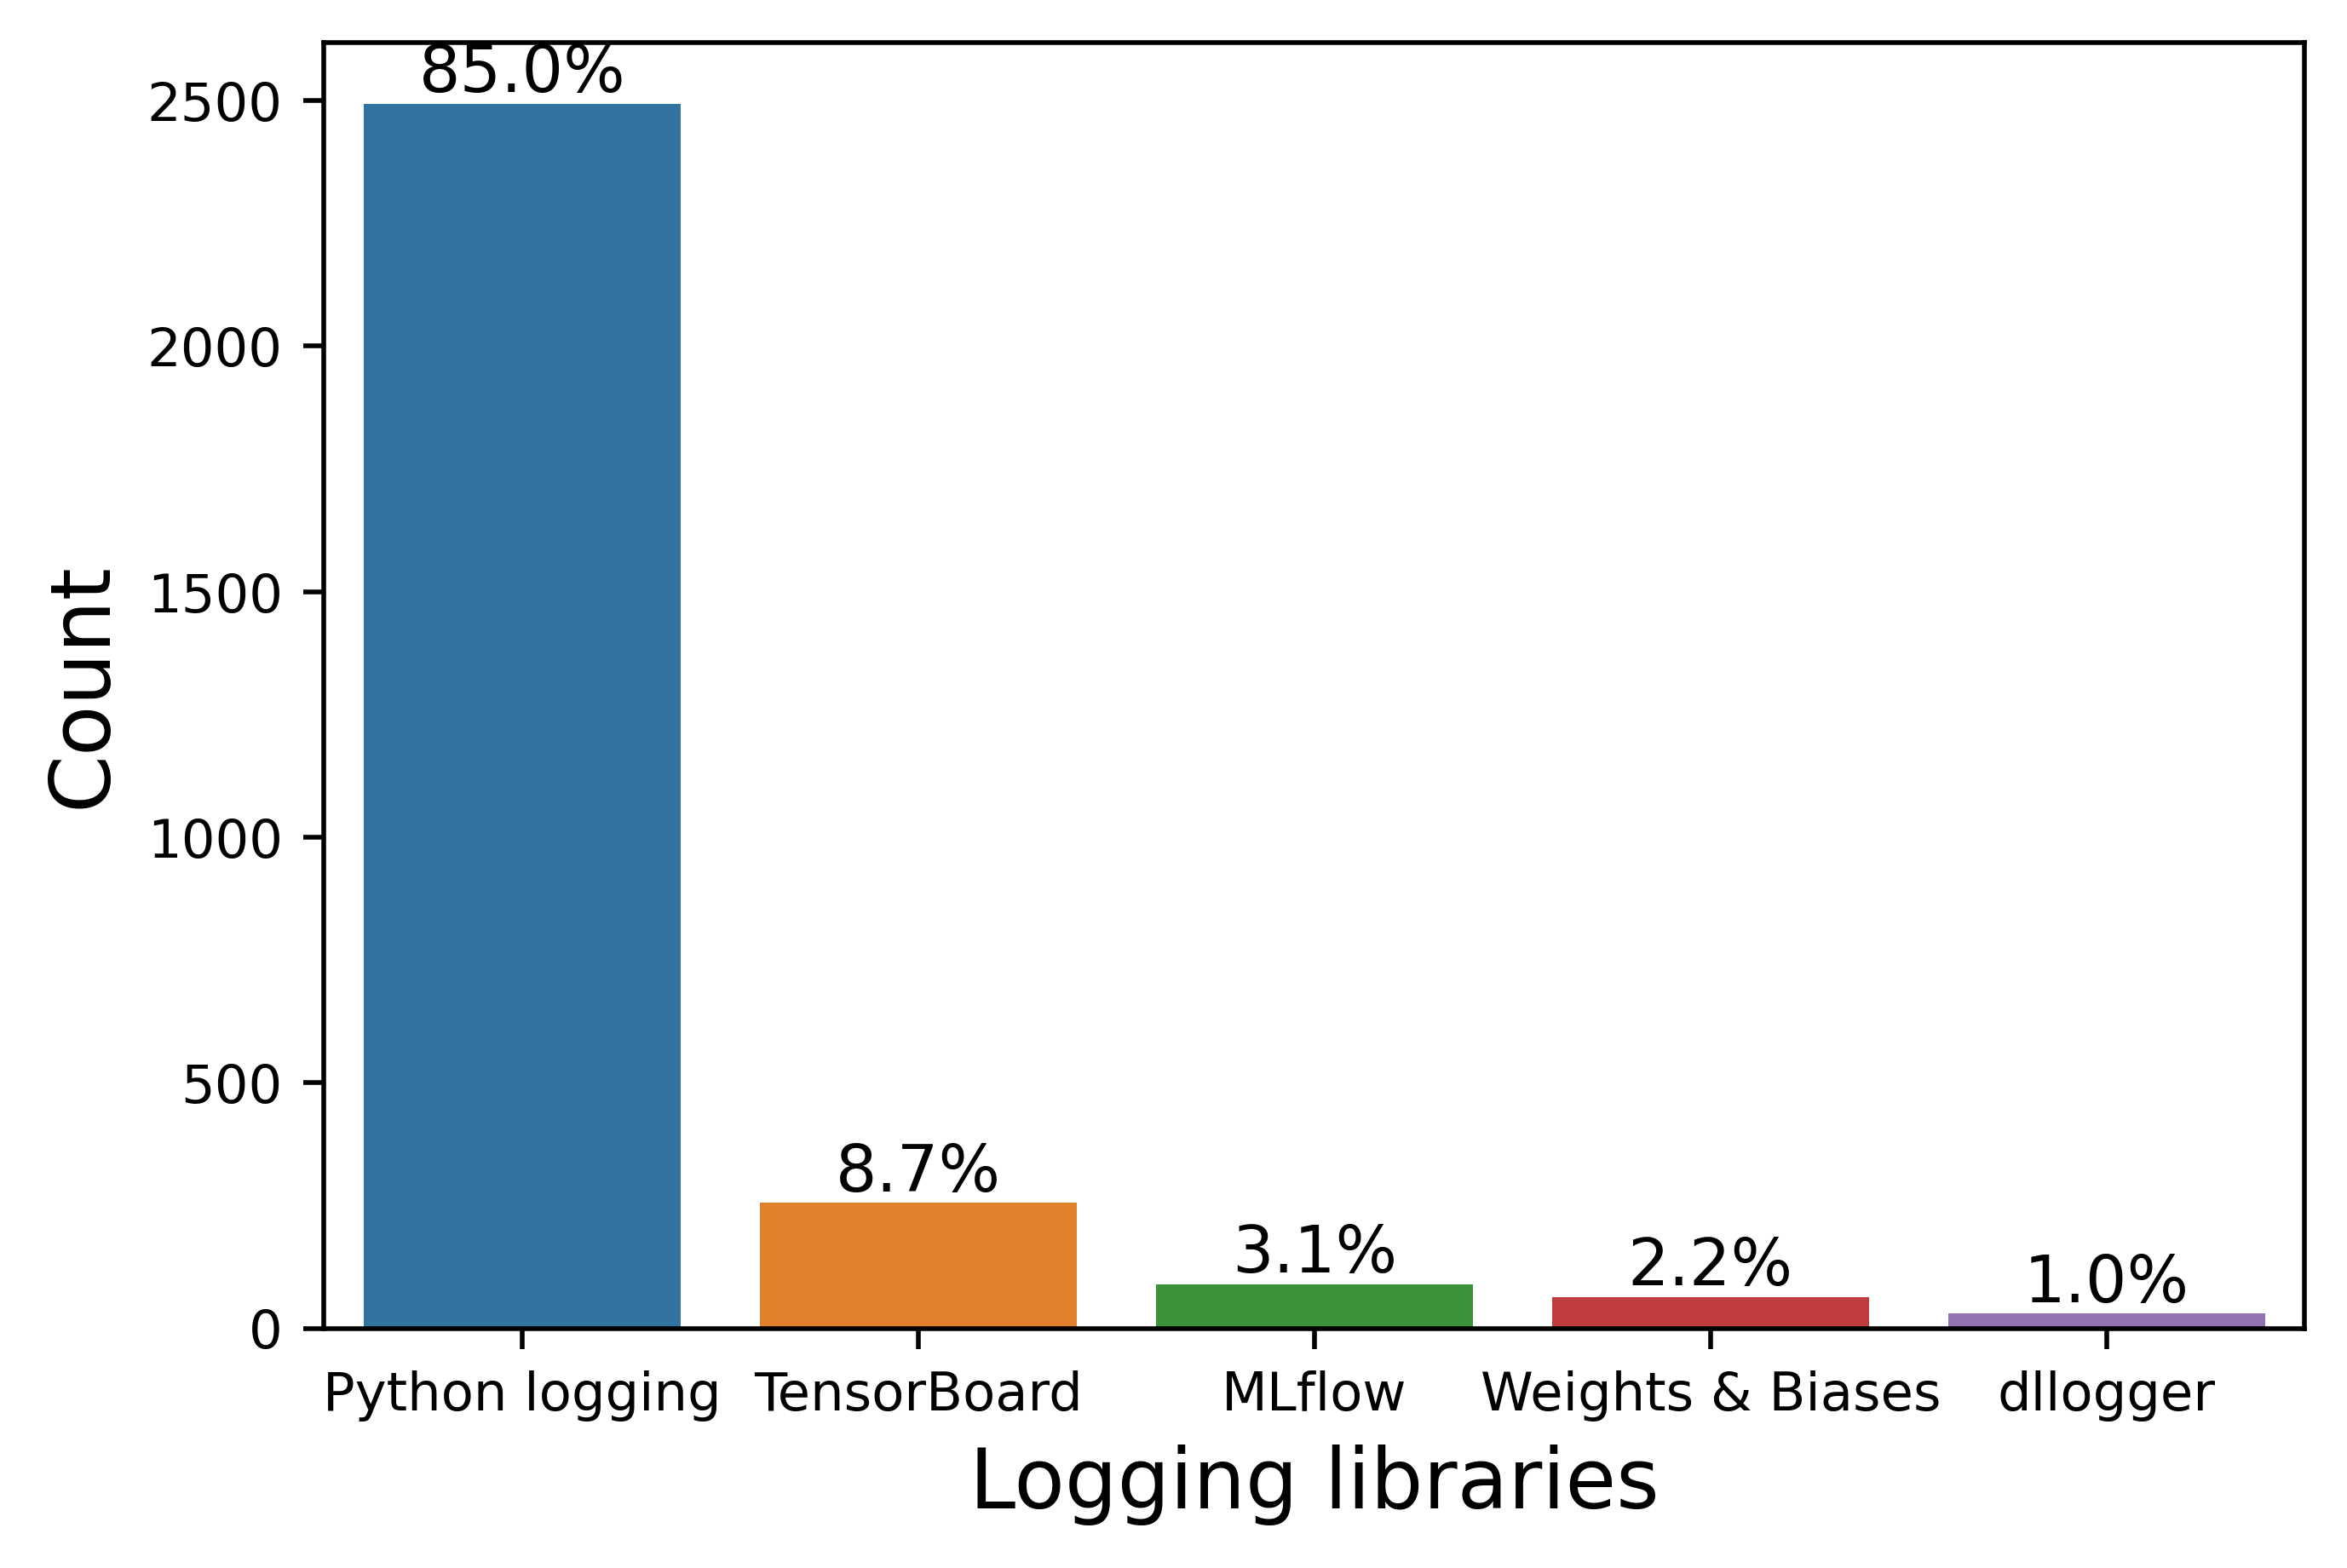

In [49]:
plot_logging_types(final_data, "logging_distribution.pdf")

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_logging_types(df, filename):
    # Set the font size for the plot
    plt.rcParams.update({'font.size': 12})

    # Create a bar plot of the logging types
    plt.figure(figsize=(10, 6), dpi=300)
    ax = sns.countplot(x='logging_type', data=df, palette='tab10', order=df['logging_type'].value_counts().index)
    plt.xlabel('Logging libraries', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    # Add percentage labels on top of each bar
    total = float(len(df))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

    # Save the figure to the specified filename
    plt.savefig(filename, dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()
